Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [64]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [65]:
import nsfg
import pandas
import math
import thinkstats2
import thinkplot
import numpy as np
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]



A scatter plot of birth weight versus mother’s age

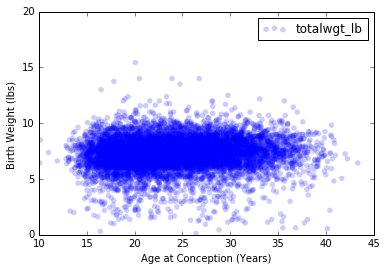

In [66]:
thinkplot.Scatter(live.agecon/100,live.totalwgt_lb)
thinkplot.Show(xlabel='Age at Conception (Years)',
               ylabel ='Birth Weight (lbs) ',
               axis=[10,45,0,20])


Percentiles of birth weight versus mother’s age (calculations)

In [67]:
live = live.dropna(subset=['agecon', 'totalwgt_lb'])
bins = np.arange(10, 45, 2)
indices = np.digitize(live.agecon/100, bins)
groups = live.groupby(indices)
agecons = [group.agecon.mean()/100 for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

Percentiles of birth weight versus mother’s age (plotting)

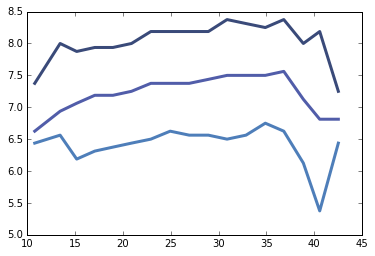

In [68]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(agecons, weights, label=label)

Pearson’s and Spearman’s correlations

In [69]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany =  np.mean(ys)
   
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

print "Pearson Correlations: " + str(Corr(live.agecon,live.totalwgt_lb))
print "Spearman Correlations: " + str(SpearmanCorr(live.agecon,live.totalwgt_lb))

Pearson Correlations: 0.0643236327353
Spearman Correlations: 0.0913680035823


Characterization: There seems to be a small but noticable correlation between the mother's age and the child's birth weight. Based on the Pearson and Spearman Correlation coeffiecients it seems the correlation in somewhat nonlinear. This is supported by a visual analysis of the percentile graph. In the Percentile graph it appears that the child's birth weight increases the older the mother is until around age 37, at which point the child's birth weight decreases the older the mother is. 